<a href="https://colab.research.google.com/github/malakalhanafi02/Predictive-Energy-Consumption/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from ucimlrepo import fetch_ucirepo # Used to import the dataset
import pandas as pd
import numpy as np

# fetch dataset
dataset = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets

# metadata
print(dataset.metadata)

# variable information
print(dataset.variables)

c:\Users\gwatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [23]:
category = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X[category] = X[category].apply(pd.to_numeric, errors='coerce')

In [24]:
PF = np.cos(np.arctan(X['Global_reactive_power'] / X['Global_active_power']))
X.insert(4, 'Power_factor', PF, True)
X.describe(include='all')

,Date,Time,Global_active_power,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
unique,1442,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6/12/2008,17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1440,1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.091615e+00,1.237145e-01,9.636864e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,NaN,1.057294e+00,1.127220e-01,5.810473e-02,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,NaN,NaN,7.600000e-02,0.000000e+00,5.558553e-01,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,3.080000e-01,4.800000e-02,9.519593e-01,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,6.020000e-01,1.000000e-01,9.934251e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,1.528000e+00,1.940000e-01,9.997272e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


In [54]:
X['Power_factor'].quantile(q=0.01)

0.7568230077691596

In [25]:
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import MaxNLocator

# Adjust Date_Time column for sensible plots
DateTime = X['Date'].str.cat(X['Time'].values.astype(str), sep=' ')
X.insert(0, 'Date_Time', DateTime, True) #includes Date_time variable
X = X.drop('Date', axis=1) #removes date column
X = X.drop('Time', axis=1) #removes time column
X.describe(include='all')

,Date_Time,Global_active_power,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
unique,2075259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/12/2006 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.091615e+00,1.237145e-01,9.636864e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,1.057294e+00,1.127220e-01,5.810473e-02,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,NaN,7.600000e-02,0.000000e+00,5.558553e-01,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,3.080000e-01,4.800000e-02,9.519593e-01,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,6.020000e-01,1.000000e-01,9.934251e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,1.528000e+00,1.940000e-01,9.997272e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


In [26]:
GAE = X['Global_active_power']*(1000/60) - X['Sub_metering_1'] - X['Sub_metering_2'] - X['Sub_metering_3']
X.insert(1, 'GAE', GAE, True)

In [27]:
#Create a Reduced Set for easier training
skipped_values = 10 #Every tenth value is retained
X_reduced = X[::skipped_values]
X_reduced.describe(include='all')

,Date_Time,GAE,Global_active_power,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,207526,204926.000000,204926.000000,204926.000000,204926.000000,204926.000000,204926.000000,204926.000000,204926.000000,204926.000000
unique,207526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/12/2006 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.312379,1.091797,0.123788,0.963608,240.835791,4.628125,1.128383,1.297976,6.457877
std,NaN,9.576747,1.057714,0.112698,0.058164,3.232609,4.445374,6.180509,5.810944,8.434605
min,NaN,-1.900000,0.078000,0.000000,0.572315,223.200000,0.200000,0.000000,0.000000,0.000000
25%,NaN,3.833333,0.308000,0.048000,0.951758,238.990000,1.400000,0.000000,0.000000,0.000000
50%,NaN,5.500000,0.602000,0.100000,0.993354,241.010000,2.600000,0.000000,0.000000,1.000000
75%,NaN,10.366667,1.528000,0.194000,0.999722,242.870000,6.400000,0.000000,1.000000,17.000000


In [28]:
skip_days = 10
days = 3
X_start_index = (skip_days * 24 * 60)
X_end_index = ((days + skip_days) * 24 * 60)
X_skipped = X[X_start_index:X_end_index]
#X.describe(include='all')
X_reduced = X_reduced[X_start_index//skipped_values:X_end_index//skipped_values]
X_reduced.describe(include='all')



,Date_Time,GAE,Global_active_power,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,432,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
unique,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,26/12/2006 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.144290,1.552963,0.132231,0.968398,243.263426,6.534259,0.645833,1.175926,6.916667
std,NaN,14.642397,1.251110,0.106721,0.052853,3.619074,5.184998,4.786100,6.508362,8.664807
min,NaN,2.933333,0.210000,0.000000,0.739940,231.180000,1.000000,0.000000,0.000000,0.000000
25%,NaN,5.425000,0.398000,0.034500,0.960552,240.740000,1.800000,0.000000,0.000000,0.000000
50%,NaN,9.616667,1.394000,0.140000,0.995134,243.155000,5.800000,0.000000,0.000000,0.000000
75%,NaN,27.358333,2.400000,0.192000,0.999947,245.952500,9.800000,0.000000,0.000000,18.000000


In [29]:
X.describe(include='all')

,Date_Time,GAE,Global_active_power,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
unique,2075259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/12/2006 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.314693e+00,1.091615e+00,1.237145e-01,9.636864e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,9.585916e+00,1.057294e+00,1.127220e-01,5.810473e-02,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,NaN,-2.400000e+00,7.600000e-02,0.000000e+00,5.558553e-01,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,3.800000e+00,3.080000e-01,4.800000e-02,9.519593e-01,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,5.500000e+00,6.020000e-01,1.000000e-01,9.934251e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,1.036667e+01,1.528000e+00,1.940000e-01,9.997272e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


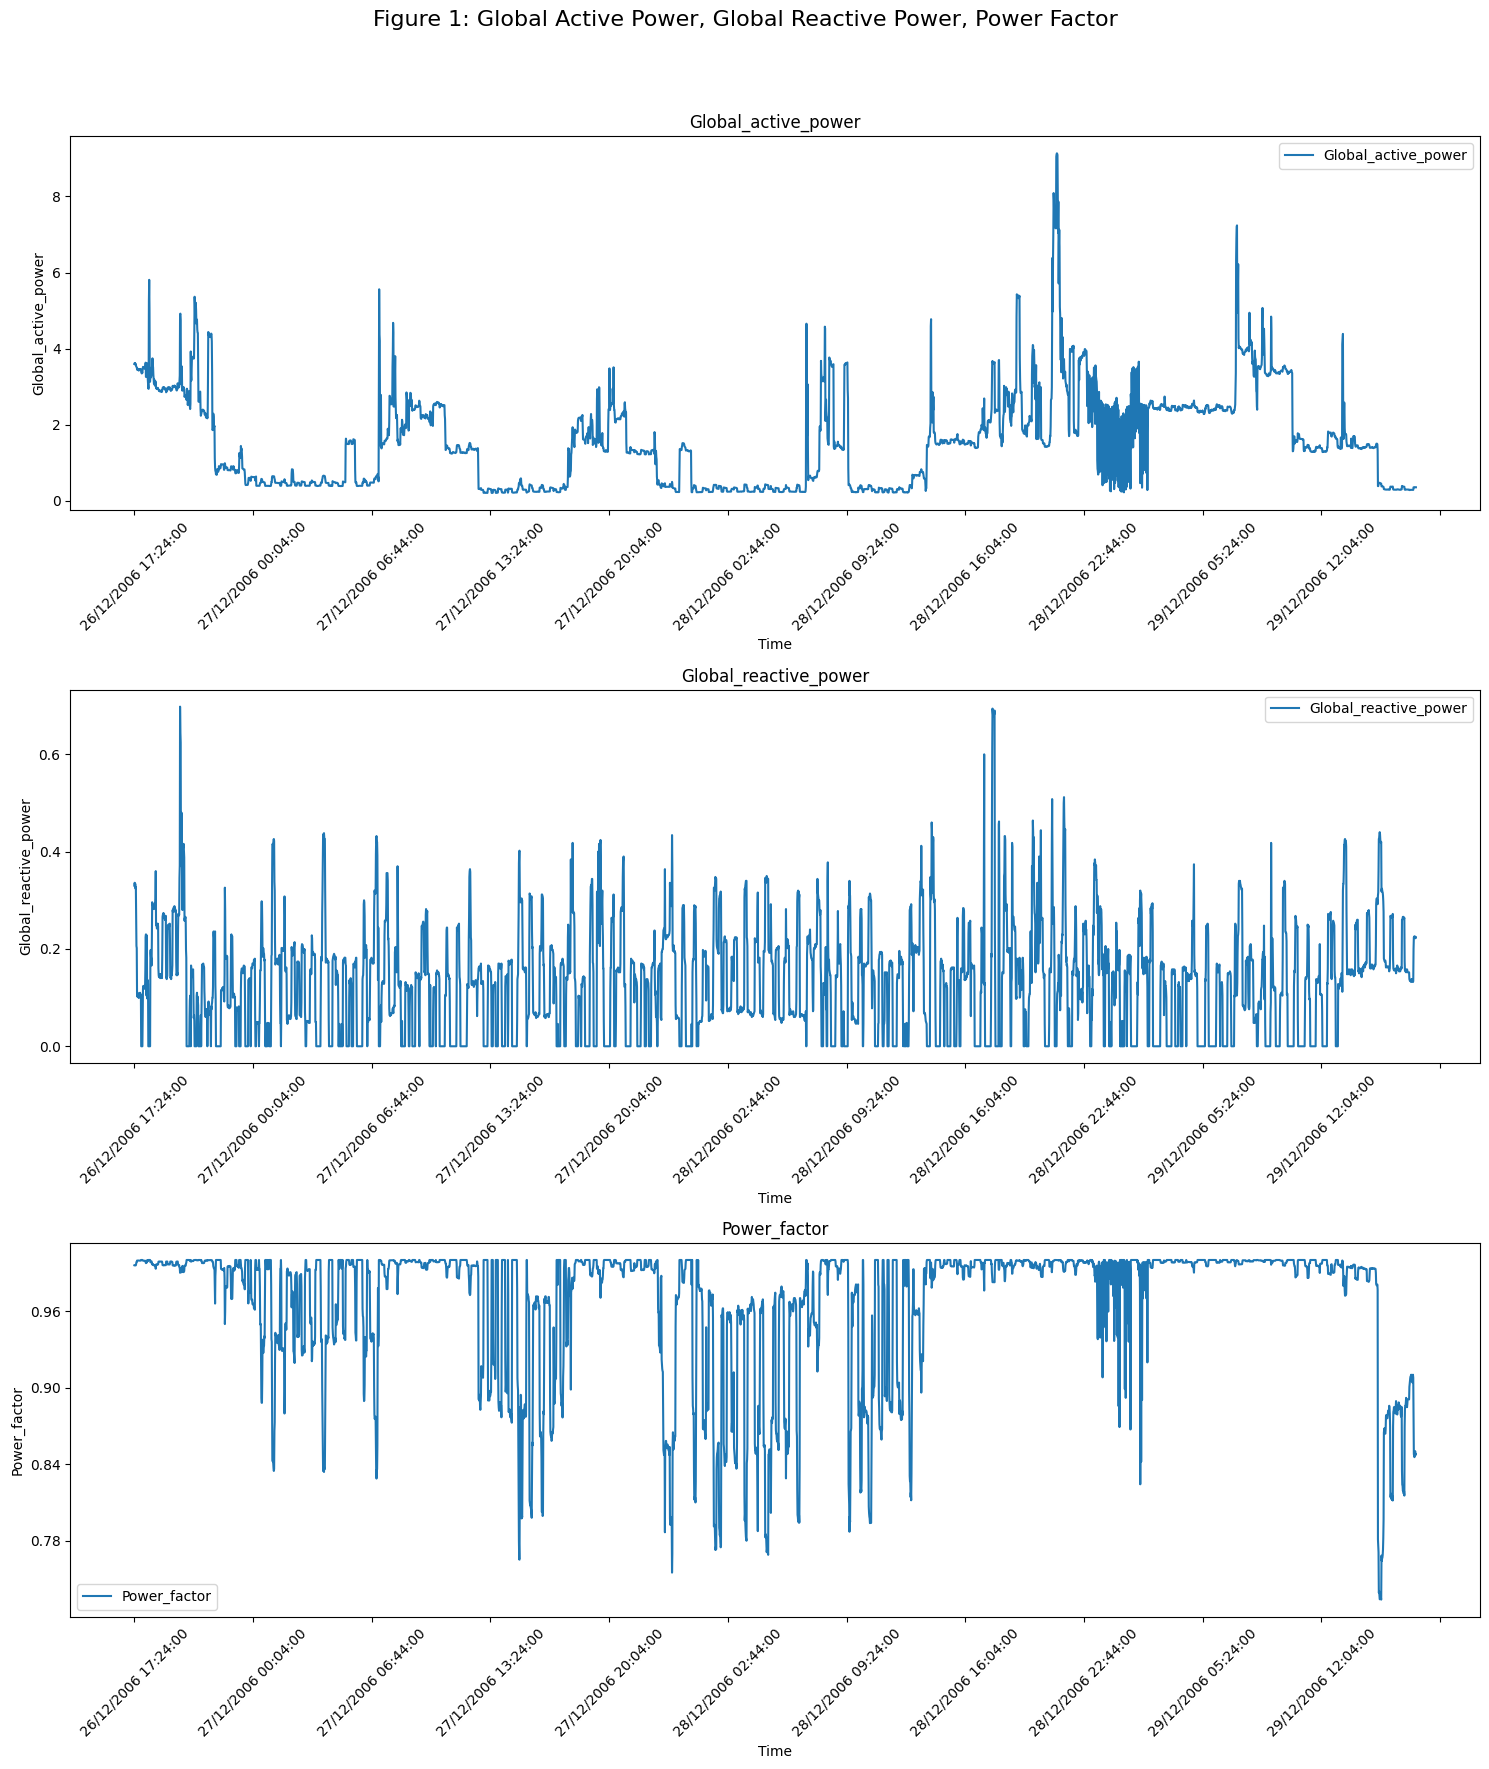

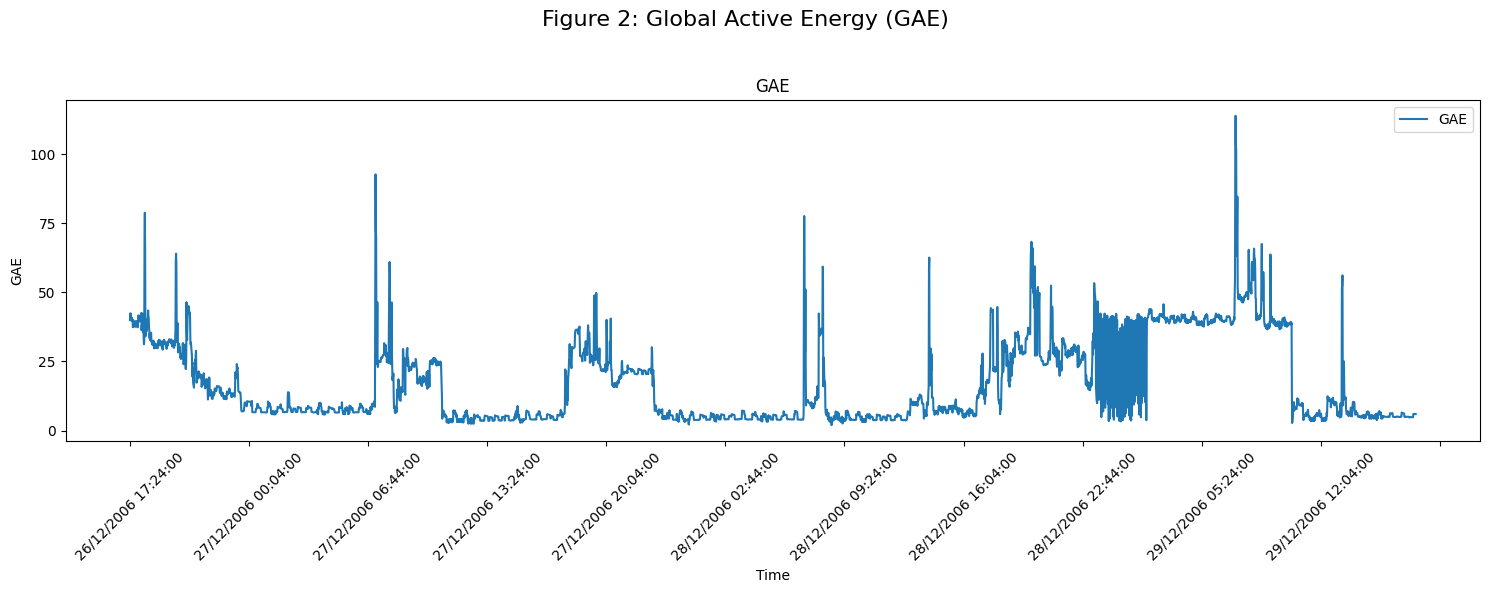

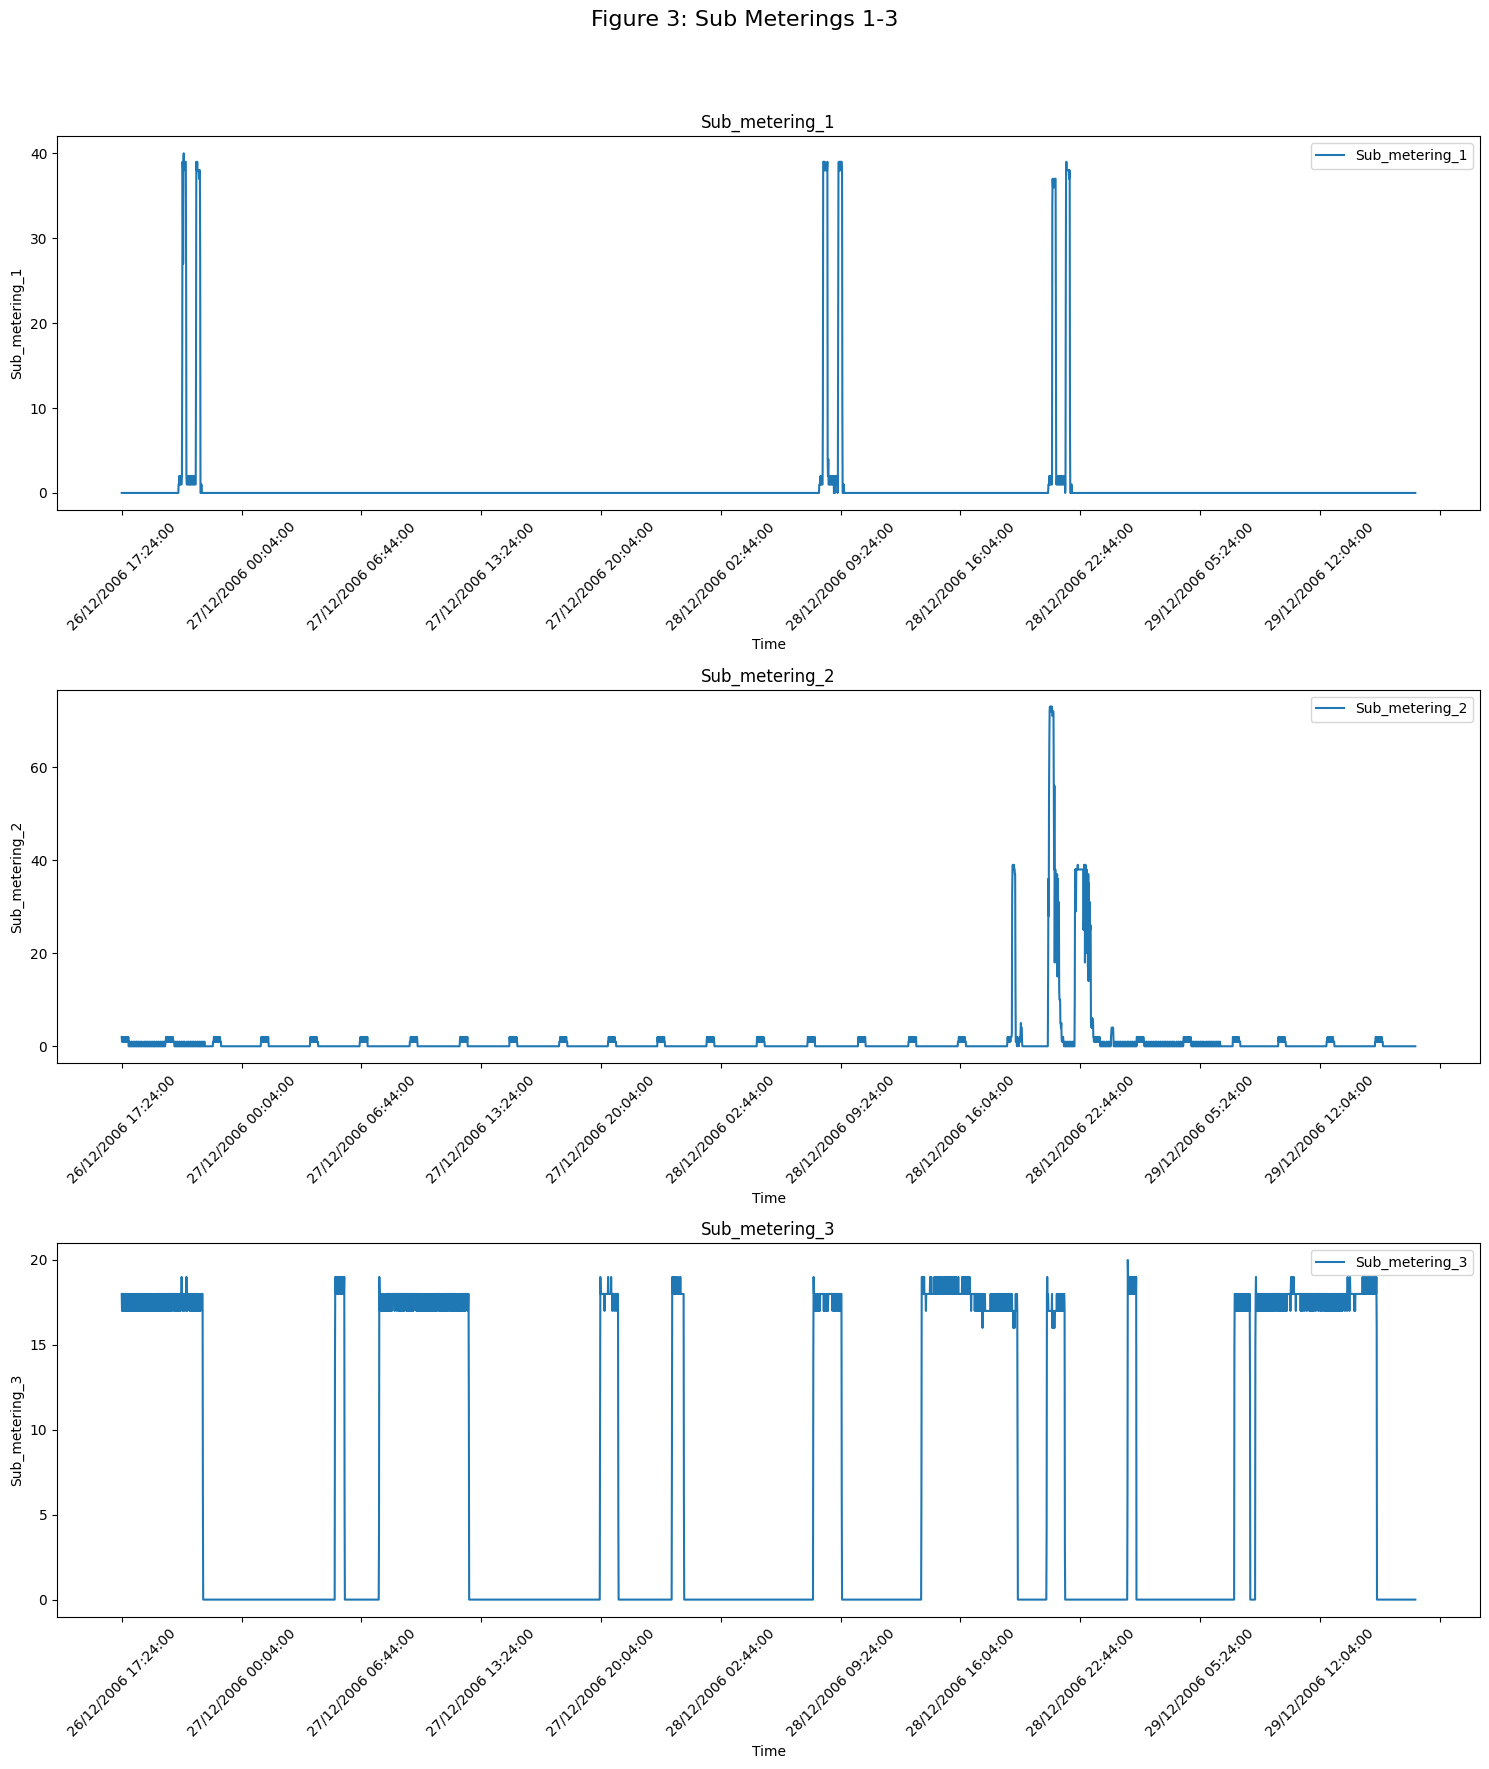

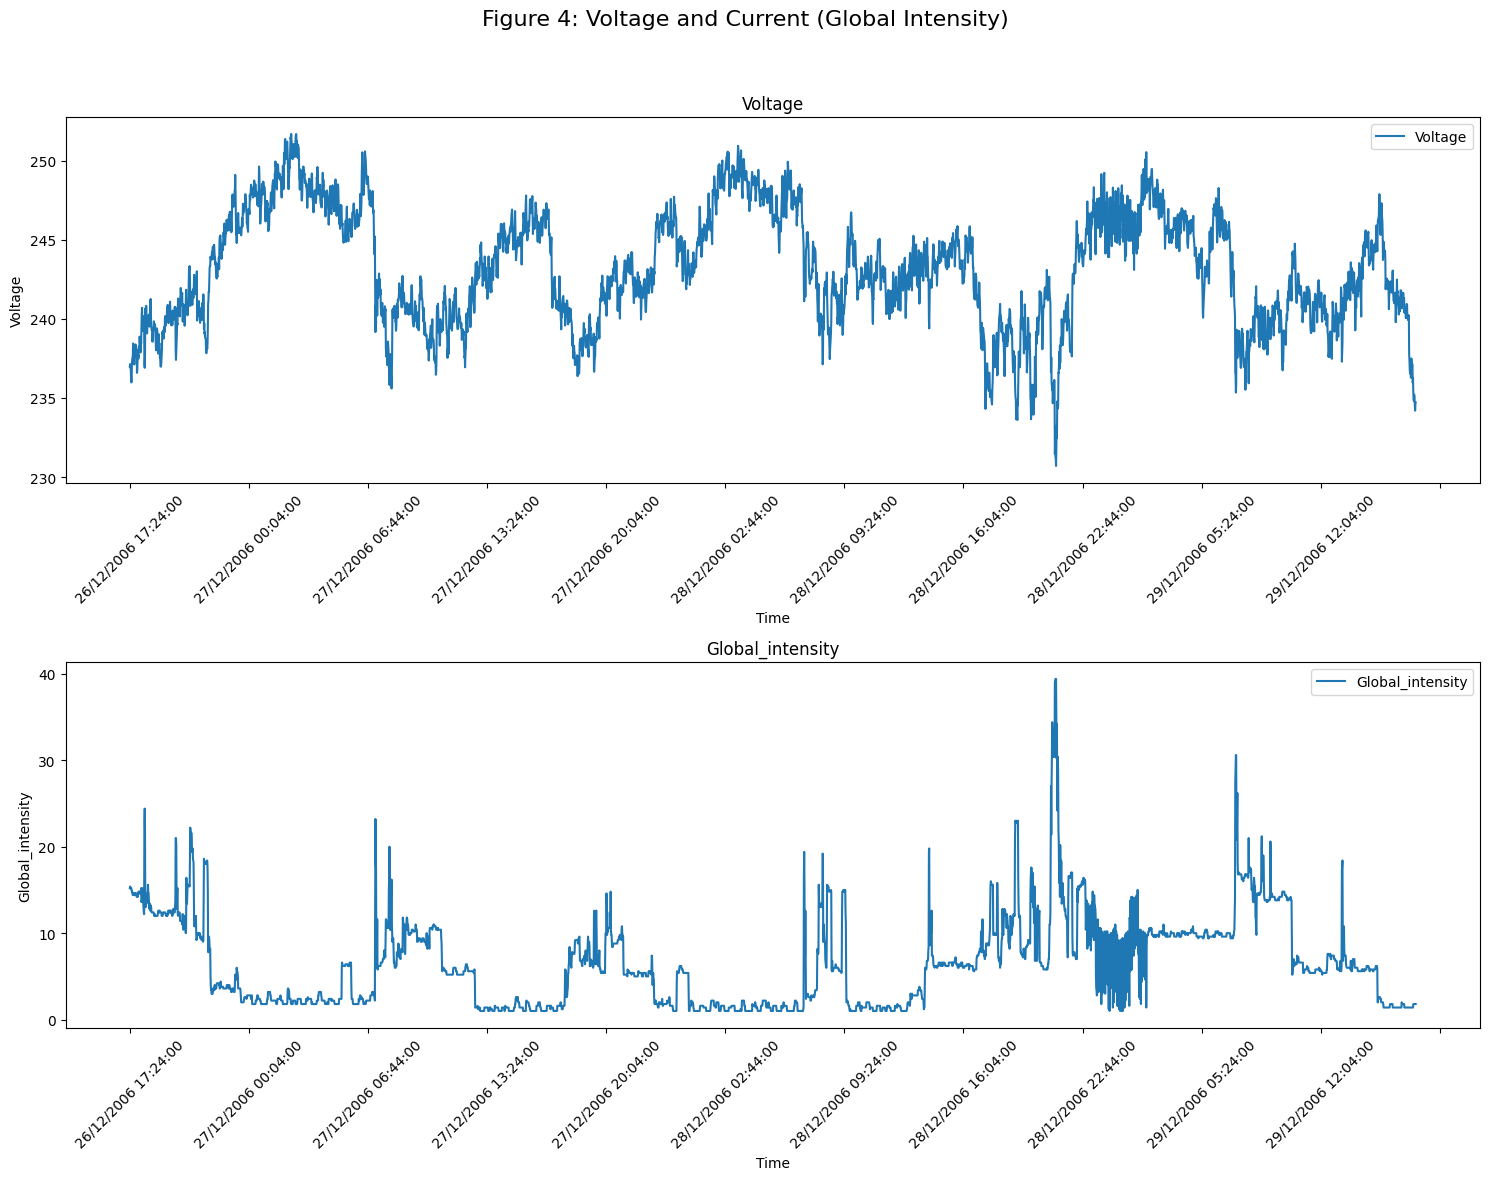

In [41]:
# Define categories for each figure
fig1_categories = ['Global_active_power', 'Global_reactive_power', 'Power_factor']
fig2_categories = ['GAE']
fig3_categories = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
fig4_categories = ['Voltage', 'Global_intensity']

# Helper function to create and format each figure
def create_figure(categories, fig_title):
    fig, axes = plt.subplots(len(categories), figsize=(15, 6 * len(categories)))
    fig.suptitle(fig_title, fontsize=16)

    for i, category in enumerate(categories):
        ax = axes[i] if len(categories) > 1 else axes
        ax.plot(X_skipped['Date_Time'], X_skipped[category], label=category)
        ax.set_title(category)
        ax.set_xlabel('Time')
        ax.set_ylabel(category)
        ax.legend()

        # Set the number of x-axis ticks to 12 and rotate labels
        ax.xaxis.set_major_locator(MaxNLocator(13))
        ax.tick_params(axis='x', rotation=45)
        
        # Set the number of y-axis ticks to 5
        ax.yaxis.set_major_locator(MaxNLocator(5))

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Create each figure based on the planned categories
create_figure(fig1_categories, 'Figure 1: Global Active Power, Global Reactive Power, Power Factor')
create_figure(fig2_categories, 'Figure 2: Global Active Energy (GAE)')
create_figure(fig3_categories, 'Figure 3: Sub Meterings 1-3')
create_figure(fig4_categories, 'Figure 4: Voltage and Current (Global Intensity)')

IndexError: index 8 is out of bounds for axis 0 with size 8

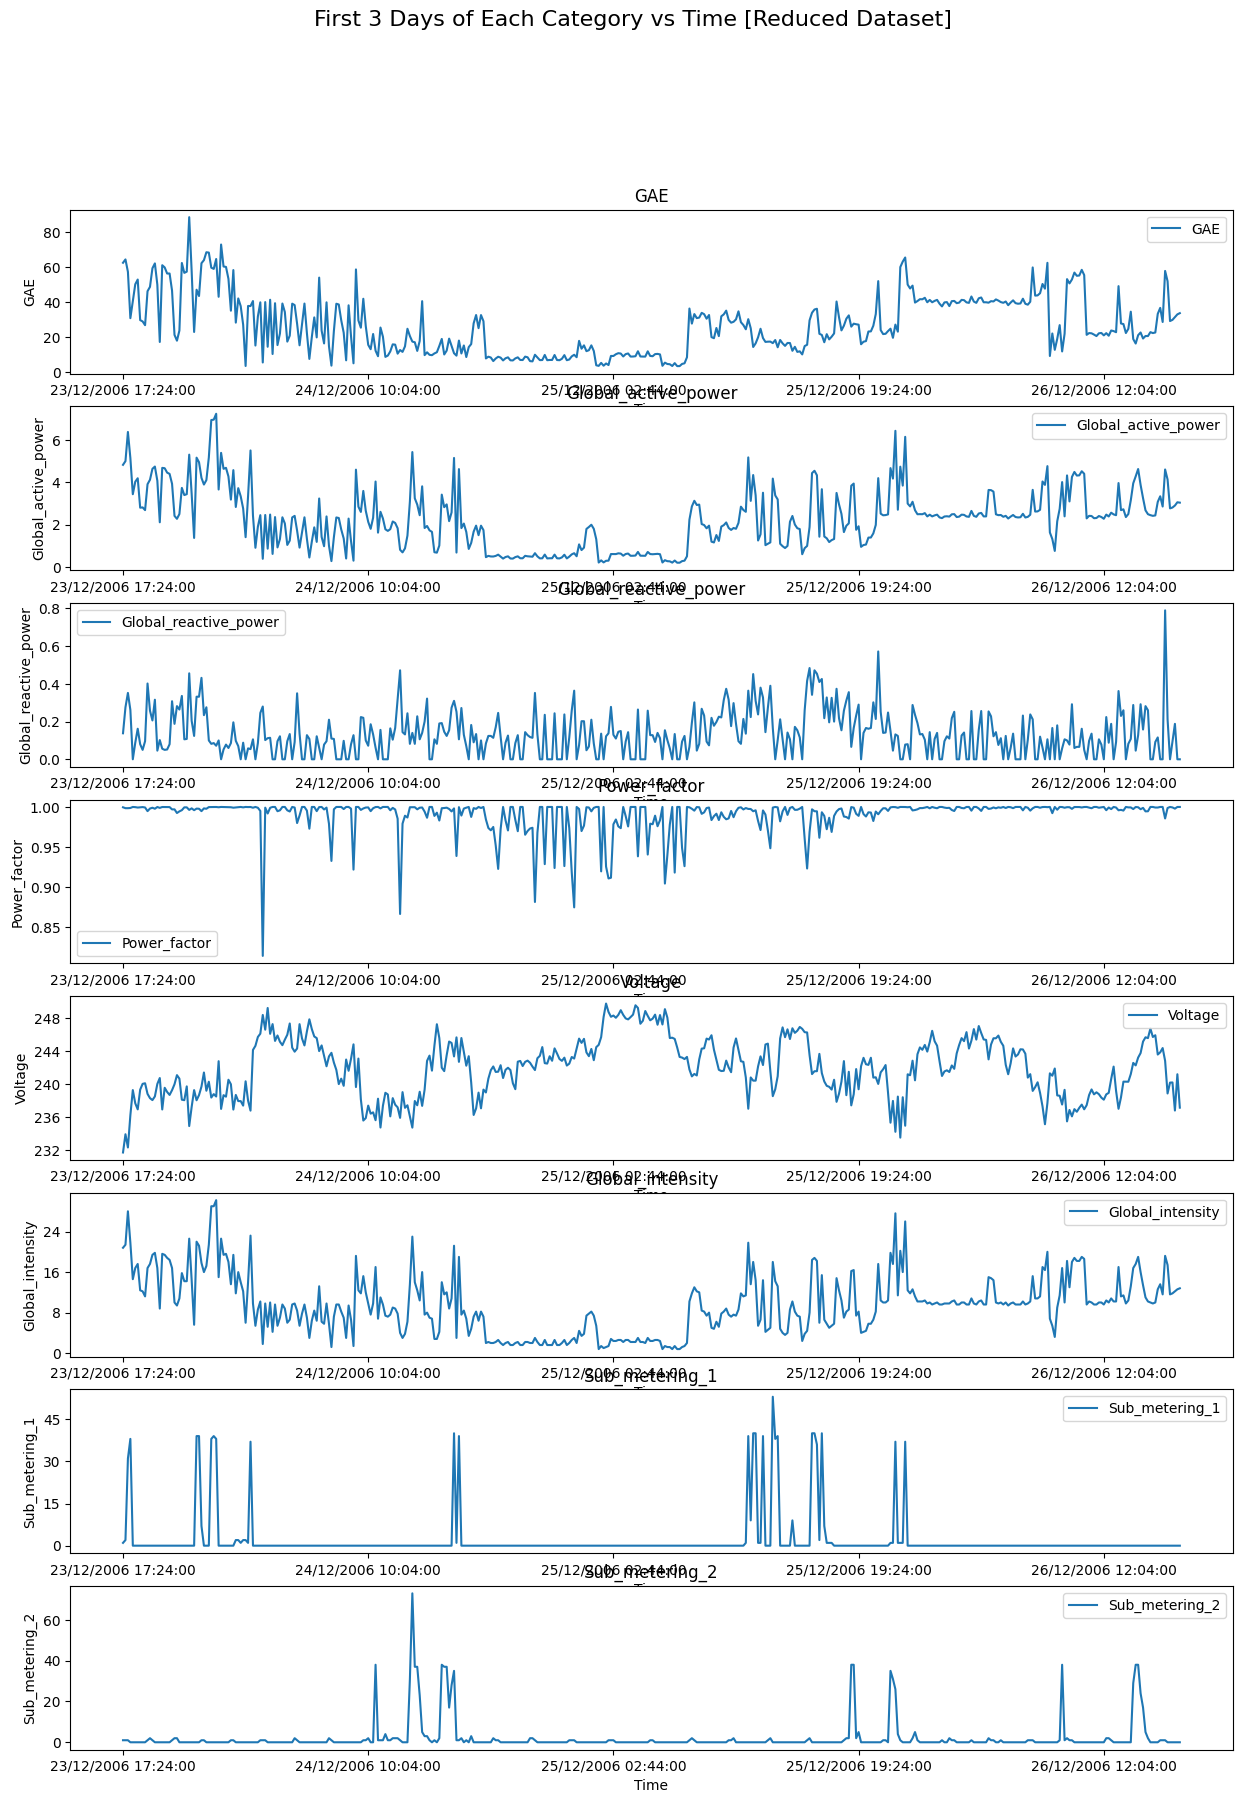

In [ ]:
# Create plots for each category
fig, axes = plt.subplots(8, figsize=(15, 20))
fig.suptitle('First 3 Days of Each Category vs Time [Reduced Dataset]', fontsize=16)

category = ['GAE', 'Global_active_power', 'Global_reactive_power','Power_factor', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


# Plot each category
for i, category in enumerate(category):
    ax = axes[i]
    ax.plot(X_reduced['Date_Time'], X_reduced[category], label=category)
    ax.set_title(category)
    ax.set_xlabel('Time')
    ax.set_ylabel(category)
    ax.legend()

    # Limit the number of x-axis ticks to avoid clutter
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Adjust the number as needed
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()